In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import heapq

In [4]:
course_chapter_items_df = pd.read_csv('./data/course_chapter_items.csv')
course_df = pd.read_csv('./data/courses.csv')
users_df = pd.read_csv('./data/users.csv')
subgroups_df = pd.read_csv('./data/subgroups.csv')

train_group_df = pd.read_csv('./data/train_group.csv')
test_seen_group_df = pd.read_csv('./data/test_seen_group.csv')
val_seen_group_df = pd.read_csv('./data/val_seen_group.csv')
test_unseen_group_df = pd.read_csv('./data/test_unseen_group.csv')
val_unseen_group_df = pd.read_csv('./data/val_unseen_group.csv')

train_df = pd.read_csv('./data/train.csv')
test_seen_df = pd.read_csv('./data/test_seen.csv')
val_seen_df = pd.read_csv('./data/val_seen.csv')
test_unseen_df = pd.read_csv('./data/test_unseen.csv')
val_unseen_df = pd.read_csv('./data/val_unseen.csv')

## 自建工具

In [3]:
def check_row_number_with_unique_amount(df, df_name, column):
    nrow = df.shape[0]
    nunique = pd.unique(df.loc[:,column]).shape[0]
    msg = f'dataframe {df_name} row number != unique {column} amount'
    assert nrow == nunique, msg
    print(f'dataframe {df_name} row number == unique {column} amount ({nrow} == {nunique})')

def check_unique_items_are_same_set(df1, df1_name, df1_column, df2, df2_name, df2_column):
    df1_set = set(df1.loc[:,df1_column].to_list())
    df2_set = set(df2.loc[:,df2_column].to_list())
    diff = df1_set.symmetric_difference(df2_set)
    msg = f'unique {df1_name}.{df1_column} & unique {df2_name}.{df2_column} are different'
    assert len(diff) == 0, msg
    print(f'unique {df1_name}.{df1_column} & unique {df2_name}.{df2_column} are the same')

## NaN 檢查

In [4]:
course_chapter_items_df_nans = course_chapter_items_df.isnull().sum().sum()
course_df_nans = course_df.isnull().sum().sum()
users_df_nans = users_df.isnull().sum().sum()
subgroups_df_nans = subgroups_df.isnull().sum().sum()

train_group_df_nans = train_group_df.isnull().sum().sum()
test_seen_group_df_nans = test_seen_group_df.isnull().sum().sum()
val_seen_group_df_nans = val_seen_group_df.isnull().sum().sum()
test_unseen_group_df_nans = test_unseen_group_df.isnull().sum().sum()
val_unseen_group_df_nans = val_unseen_group_df.isnull().sum().sum()

train_df_nans = train_df.isnull().sum().sum()
test_seen_df_nans = test_seen_df.isnull().sum().sum()
val_seen_df_nans = val_seen_df.isnull().sum().sum()
test_unseen_df_nans = test_unseen_df.isnull().sum().sum()
val_unseen_df_nans = val_unseen_df.isnull().sum().sum()

pd.DataFrame({'df_name':[    
    "course_chapter_items", 
    "course", 
    "users", 
    "subgroups", 
    "train_group",
    "test_seen_group", 
    "val_seen_group", 
    "test_unseen_group", 
    "val_unseen_group", 
    "train", 
    "test_seen", 
    "val_seen", 
    "test_unseen", 
    "val_unseen"], 'nans':[
    course_chapter_items_df_nans, 
    course_df_nans, 
    users_df_nans, 
    subgroups_df_nans, 
    train_group_df_nans,
    test_seen_group_df_nans, 
    val_seen_group_df_nans, 
    test_unseen_group_df_nans, 
    val_unseen_group_df_nans, 
    train_df_nans, 
    test_seen_df_nans, 
    val_seen_df_nans, 
    test_unseen_df_nans, 
    val_unseen_df_nans]})

,df_name,nans
0,course_chapter_items,2029
1,course,69
2,users,293146
3,subgroups,0
4,train_group,705
5,test_seen_group,0
6,val_seen_group,33
7,test_unseen_group,0
8,val_unseen_group,96
9,train,0


In [5]:
course_chapter_items_df.isnull().sum()

course_id                     0
chapter_no                    0
chapter_id                    0
chapter_name                103
chapter_item_id               0
chapter_item_no               0
chapter_item_name             7
chapter_item_type             0
video_length_in_seconds    1919
dtype: int64

In [6]:
users_df.isnull().sum()

user_id                   0
gender                45195
occupation_titles    101510
interests             47810
recreation_names      98631
dtype: int64

In [7]:

train_group_df.isnull().sum()

user_id       0
subgroup    705
dtype: int64

In [8]:
val_seen_group_df.isnull().sum()

user_id      0
subgroup    33
dtype: int64

In [9]:
val_unseen_group_df.isnull().sum()

user_id      0
subgroup    96
dtype: int64

## 基本資料檢查

In [10]:
course_df_cid = pd.unique(course_df.course_id).shape[0]
course_chapter_items_df_cid = pd.unique(course_chapter_items_df.course_id).shape[0]
msg = f'amount of unique coursd_id unmatch in course_df, course_chapter_items_df ({course_df_cid} != {course_chapter_items_df_cid})'
assert course_df_cid == course_chapter_items_df_cid, msg

AssertionError: amount of unique coursd_id unmatch in course_df, course_chapter_items_df (728 != 727)

In [11]:
subgroups_df_sid = pd.unique(subgroups_df.subgroup_id).shape[0]
users_df_uid = pd.unique(users_df.user_id).shape[0]
print(f'unique subgroup id:{subgroups_df_sid}')
print(f'unique user id: {users_df_uid}')


train_df_uid_set = set(train_df.user_id.to_list())
train_group_df_uid_set = set(train_group_df.user_id.to_list())
identical_set = train_df_uid_set.symmetric_difference(train_group_df_uid_set)
msg = f'unique user_id not the same set in train_df, train_group_df'
assert len(identical_set) == 0, msg
print(f'train_df, train_group_df have the same unique user_id set')

check_unique_items_are_same_set(train_df, 'train_df', 'user_id', train_group_df, 'train_group_df', 'user_id')
check_row_number_with_unique_amount(train_df, 'train_df', 'user_id')
check_row_number_with_unique_amount(train_group_df, 'train_group_df', 'user_id')

unique subgroup id:91
unique user id: 130566
train_df, train_group_df have the same unique user_id set
unique train_df.user_id & unique train_group_df.user_id are the same
dataframe train_df row number == unique user_id amount (59737 == 59737)
dataframe train_group_df row number == unique user_id amount (59737 == 59737)


# 敘述統計

## course_chapter_items

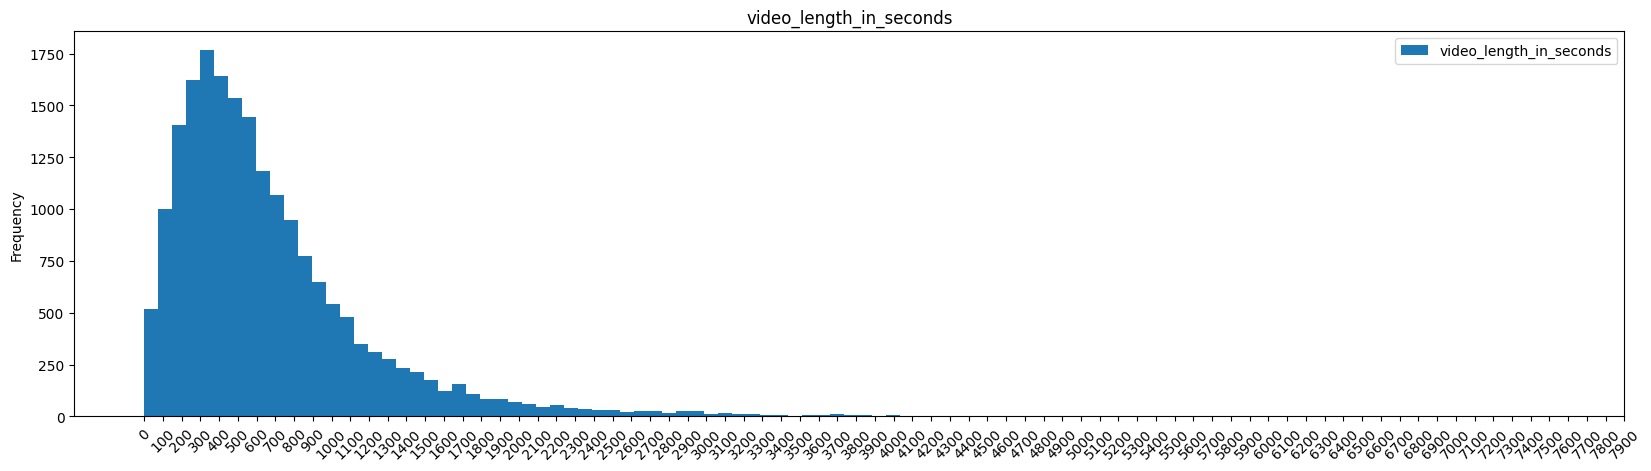

In [62]:
course_chapter_items_df[['video_length_in_seconds']].describe()

ax = course_chapter_items_df.plot.hist(column=['video_length_in_seconds'], bins=100, xticks=range(0,8000,100), figsize=(20,5), title='video_length_in_seconds')
ax.tick_params(axis='x', rotation=45)

## 檢驗相同的users在train中購買的subgroups有多少比例 valid的時候也有購買(course的為0，不會重複購買)


In [2]:
train_group_df = pd.read_csv('./data/train_group.csv')
val_seen_group_df = pd.read_csv('./data/val_seen_group.csv')

continue_to_buy_ratio = []
for i, val_user_id in enumerate(val_seen_group_df["user_id"]):
    val_user_subgroups = str(val_seen_group_df["subgroup"][i]).split()
    index_in_train_df = train_group_df[train_group_df["user_id"] == val_user_id].index.tolist()[0]
    train_user_subgroups = str(train_group_df.at[index_in_train_df, 'subgroup']).split()
    #print(val_user_subgroups)
    #print(train_user_subgroups)
    continue_to_buy = 0
    for train_user_subgroup in train_user_subgroups:
        if train_user_subgroup in val_user_subgroups:
            continue_to_buy += 1
    continue_to_buy_ratio.append(continue_to_buy/len(train_user_subgroups))
print(f"mean continue_to_buy_ratio: {sum(continue_to_buy_ratio)/len(continue_to_buy_ratio)}")

mean continue_to_buy_ratio: 0.17182368307771648


In [58]:
interest_dict = {}
design_interest_users = [] #設計
investment_interest_users = [] #投資理財
marketing_interest_users = [] #行銷
art_interest_users = [] #藝術
work_skills_interest_users = [] #職場技能
program_interest_users = [] #程式
music_interest_users = [] #音樂
photography_interest_users = [] #攝影
language_interest_users = [] #語言
lifestyle_interest_users = [] #生活品味
handmade_interest_users = [] #手作
humanities_interest_users = [] #人文
interest_list = ['設計', '投資理財', '行銷', '藝術', '職場技能', '程式', '音樂', '攝影', '語言', '生活品味', '手作', '人文']
interest_user_list = [design_interest_users, investment_interest_users, marketing_interest_users, art_interest_users, work_skills_interest_users, program_interest_users, music_interest_users, photography_interest_users, language_interest_users, lifestyle_interest_users, handmade_interest_users, humanities_interest_users]

for i, interests_full_user in enumerate(users_df["interests"]):
    if interests_full_user is None: continue
    
    interests_full_user_list = str(interests_full_user).split(",")
    interests_user = []
    for interest_full in interests_full_user_list:
        interests_user.append(str(interest_full).split("_")[0])

    interests_user = list(set(interests_user))   
    for j in range(len(interest_list)):
        if interest_list[j] in interests_user:
            interest_user_list[j].append(users_df["user_id"][i])

    for interest in interests_user:    
        if interest in interest_dict.keys():
            interest_dict[interest] += 1
        else:
            interest_dict[interest] = 1

print(interest_dict)

{'設計': 29955, '投資理財': 28838, '行銷': 25406, '藝術': 32343, '職場技能': 32854, '程式': 24044, '音樂': 14331, '攝影': 28240, '語言': 33940, '生活品味': 28882, 'nan': 47810, '手作': 15838, '人文': 10874}


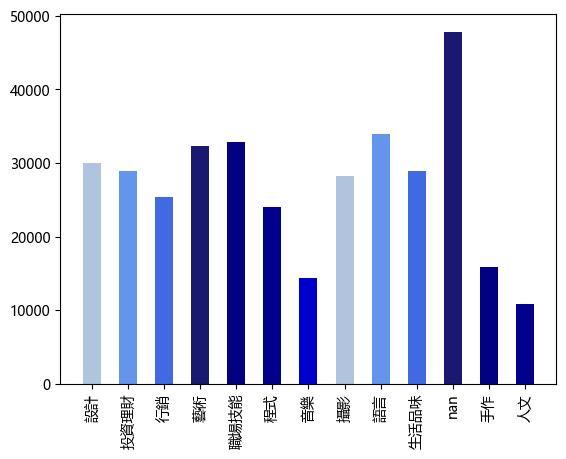

In [49]:
plt.bar(list(interest_dict.keys()),
    list(interest_dict.values()),
    width=0.5, 
    bottom=None, 
    align='center', 
    color=['lightsteelblue', 
       'cornflowerblue', 
       'royalblue', 
       'midnightblue', 
       'navy', 
       'darkblue', 
       'mediumblue'])
plt.xticks(rotation='vertical')
plt.show()

In [100]:
def get_subgroups_count_with_interest(users_interest):
    subgroups_count_list = [ 0 for i in range(len(subgroups_df)+1)]
    for i, user in enumerate(train_group_df["user_id"]):
        if user in users_interest:
            if train_group_df["subgroup"][i] is np.nan:
                continue
            user_subgroups = str(train_group_df["subgroup"][i]).split()
            for subgroup in user_subgroups: 
                    subgroups_count_list[int(subgroup)] += 1
    return(subgroups_count_list)
subgroups_count_list = get_subgroups_count_with_interest(work_skills_interest_users)

subgroups_count_interest_list = [] #(subgroups_count_list, interest)
for i in range(len(interest_user_list)):
    subgroups_count_interest_list.append((get_subgroups_count_with_interest(interest_user_list[i]), interest_list[i]))
print(subgroups_count_interest_list)


[([0, 3762, 33, 6498, 1642, 3402, 4607, 5351, 1260, 172, 23, 23, 81, 370, 182, 396, 83, 27, 21, 849, 109, 148, 199, 4303, 241, 1097, 62, 134, 247, 3039, 146, 9, 975, 1942, 3215, 550, 3391, 1766, 2551, 2621, 3615, 209, 57, 72, 45, 113, 97, 73, 31, 154, 3974, 5828, 251, 653, 433, 583, 239, 835, 324, 5383, 812, 3103, 256, 192, 712, 528, 4204, 447, 76, 1046, 559, 4428, 4069, 756, 99, 299, 354, 795, 541, 610, 68, 125, 16, 1476, 75, 1154, 29, 93, 35, 61, 54, 34], '設計'), ([0, 4000, 35, 3154, 914, 1461, 2458, 4505, 2369, 118, 26, 26, 60, 530, 280, 680, 151, 14, 13, 632, 49, 168, 75, 2314, 255, 334, 55, 76, 315, 3163, 125, 16, 801, 1868, 1181, 887, 3013, 2326, 863, 923, 2898, 210, 67, 72, 26, 133, 73, 95, 44, 242, 3854, 6018, 309, 574, 275, 844, 262, 1331, 356, 5687, 719, 3048, 237, 511, 1958, 492, 3991, 186, 132, 2783, 1403, 4359, 3951, 589, 48, 917, 1085, 292, 276, 580, 65, 193, 11, 2062, 166, 1522, 15, 89, 35, 43, 50, 34], '投資理財'), ([0, 3807, 31, 3943, 836, 1759, 2858, 4780, 1363, 127, 18, 1

## 查看相同興趣的users購買subgroups的分布

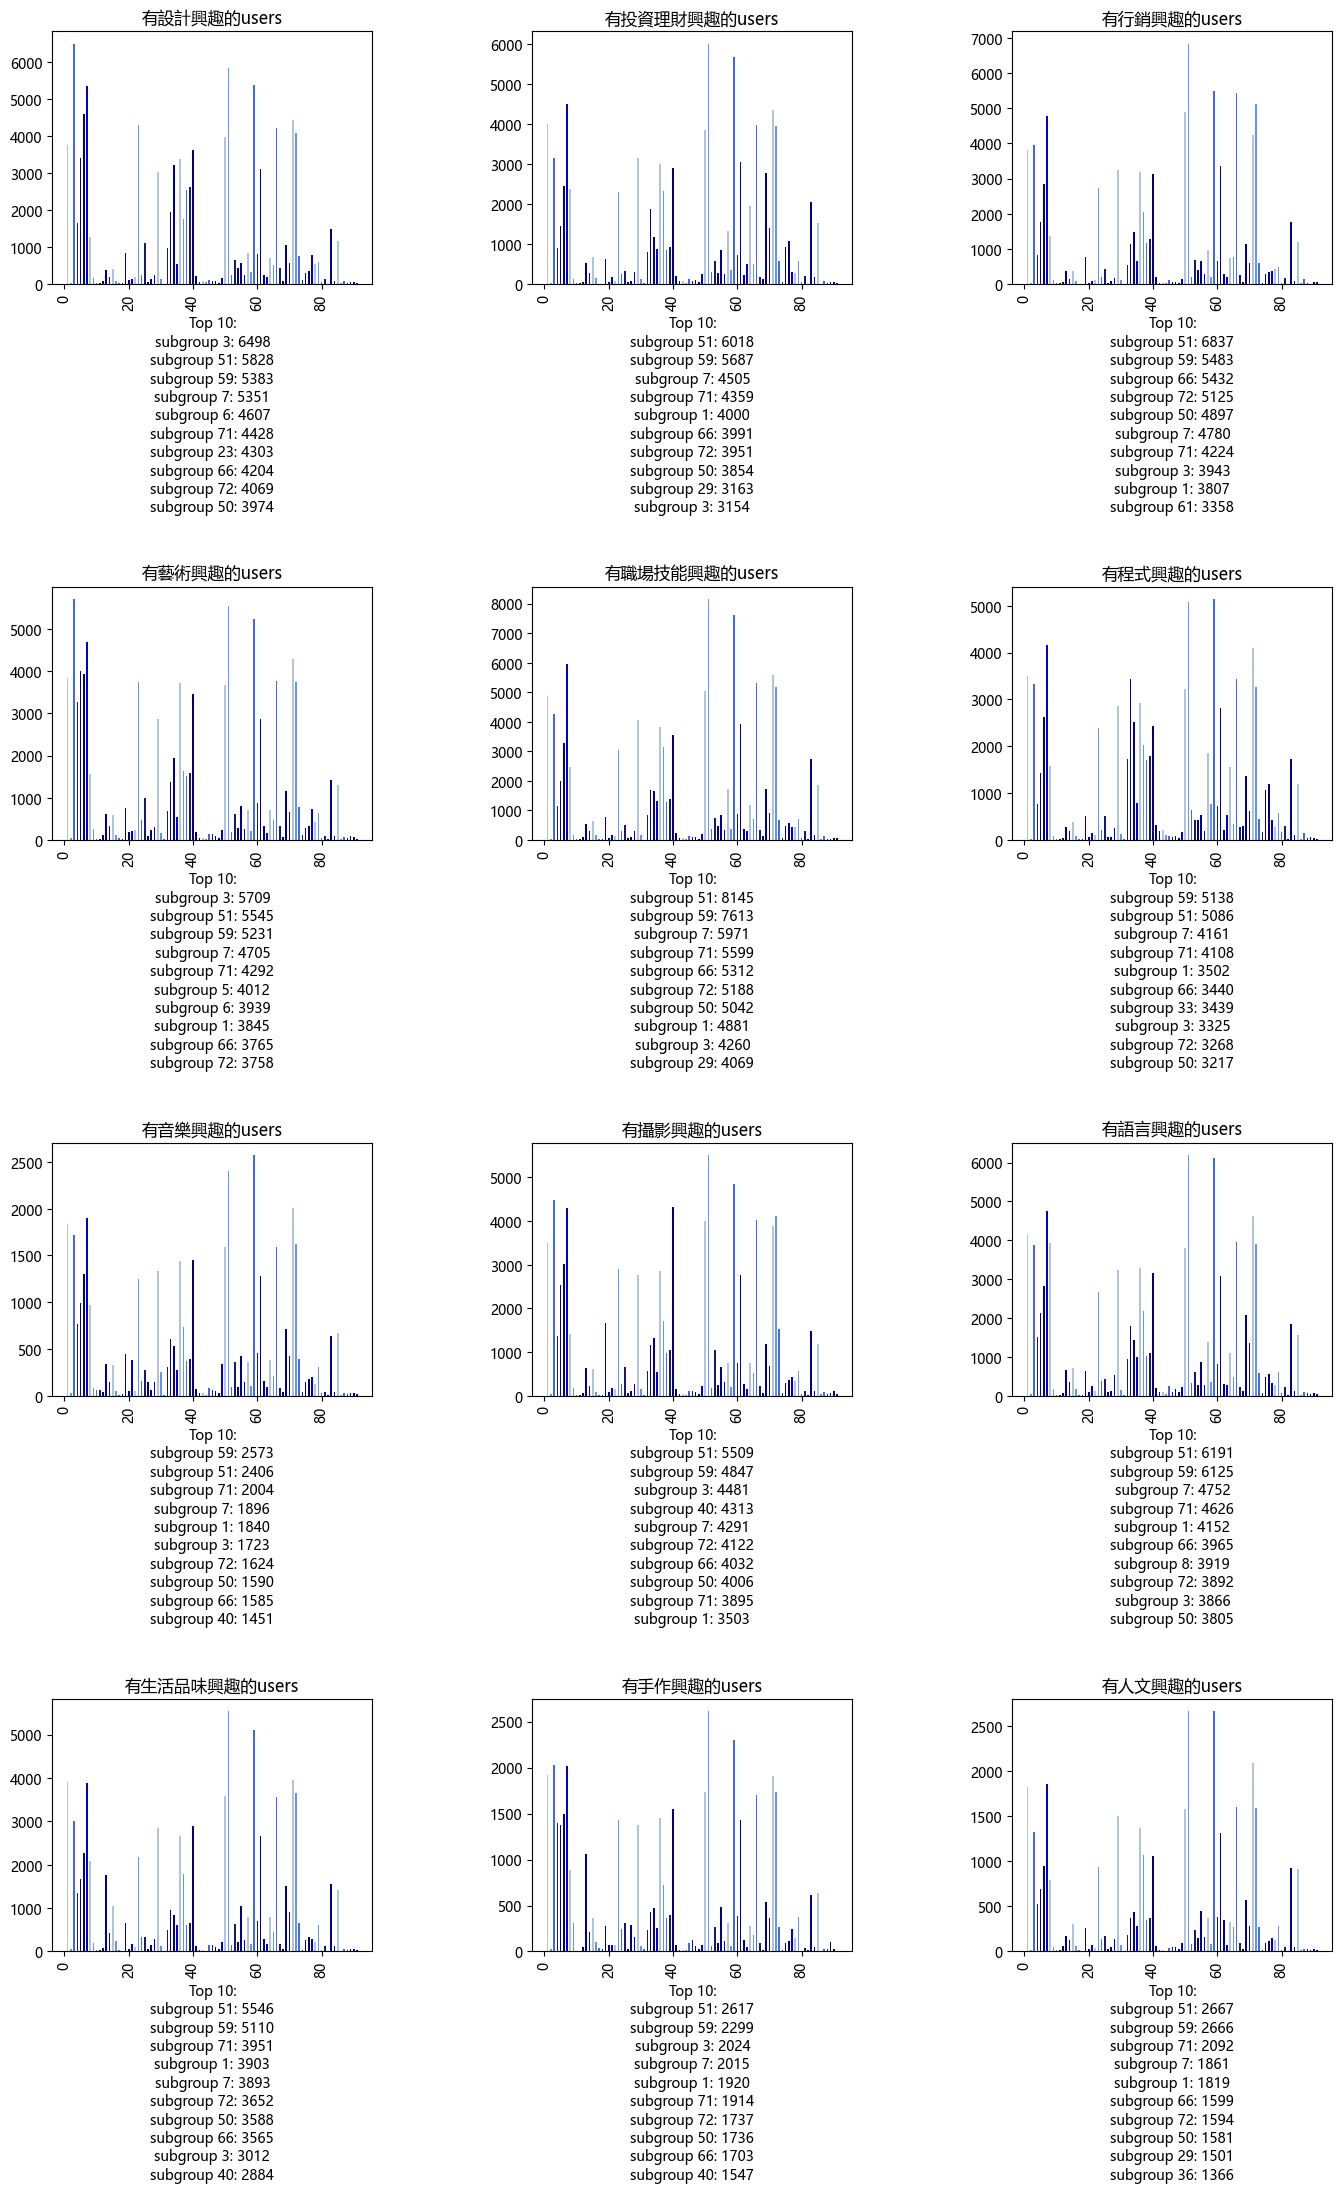

In [110]:
def draw_bar_chart(x, y, interest, top_num = 10):
        plt.bar(x,
                y,
                width=0.5, 
                bottom=None, 
                align='center', 
                color=['lightsteelblue', 
                'cornflowerblue', 
                'royalblue', 
                'midnightblue', 
                'navy', 
                'darkblue', 
                'mediumblue'])
        
        subgroup_num_top= heapq.nlargest(top_num, y)
        subgroup_top = list(map(y.index, heapq.nlargest(top_num, y)))

        plt.title("有" + interest + f"興趣的users")
        xlabel = f"Top {top_num}:"
        for i in range(top_num):
                xlabel += f"\nsubgroup {subgroup_top[i] + 1}: {subgroup_num_top[i]}"
        plt.xticks(rotation='vertical')
        plt.xlabel(xlabel)


top_num = 10
subgroups_number = range(1, len(subgroups_df)+1)      
for i in range(len(subgroups_count_interest_list)):
        plt.subplot(4, 3, i+1)
        draw_bar_chart(subgroups_number, subgroups_count_interest_list[i][0][1:], subgroups_count_interest_list[i][1], top_num)

#plt.tight_layout()
plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=2.0, 
                    top=4, 
                    wspace=0.5, 
                    hspace=0.12* top_num)
#plt.show() 
plt.show() 
